In [1]:
from src.utils.dataset import TradingDataset, TradingNormalizer

normalizer = TradingNormalizer(method='log_returns', history_len=256)

dataset = TradingDataset(
    data_path='data/',
    mode='train',
    history_len=256, 
    target_len=32,
    normalizer=normalizer,
)

Found 507130 samples for train mode


/Users/honeysuckle/dev/TradingDiffusion/.TradingGDT_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


History shape: torch.Size([1, 256, 5])
Target shape: torch.Size([1, 32, 1])
Ticker: EFX
Stats: {'first_log_price_0': np.float32(5.280314), 'log_return_mean_0': np.float32(0.001014846), 'log_return_std_0': np.float32(0.016931184), 'first_log_price_1': np.float32(5.2838607), 'log_return_mean_1': np.float32(0.0010091688), 'log_return_std_1': np.float32(0.016264506), 'first_log_price_2': np.float32(5.2669125), 'log_return_mean_2': np.float32(0.0009614589), 'log_return_std_2': np.float32(0.01728052), 'first_log_price_3': np.float32(5.269091), 'log_return_mean_3': np.float32(0.0010389702), 'log_return_std_3': np.float32(0.017515944), 'volume_mean': np.float32(842398.94), 'volume_std': np.float32(425377.44)}


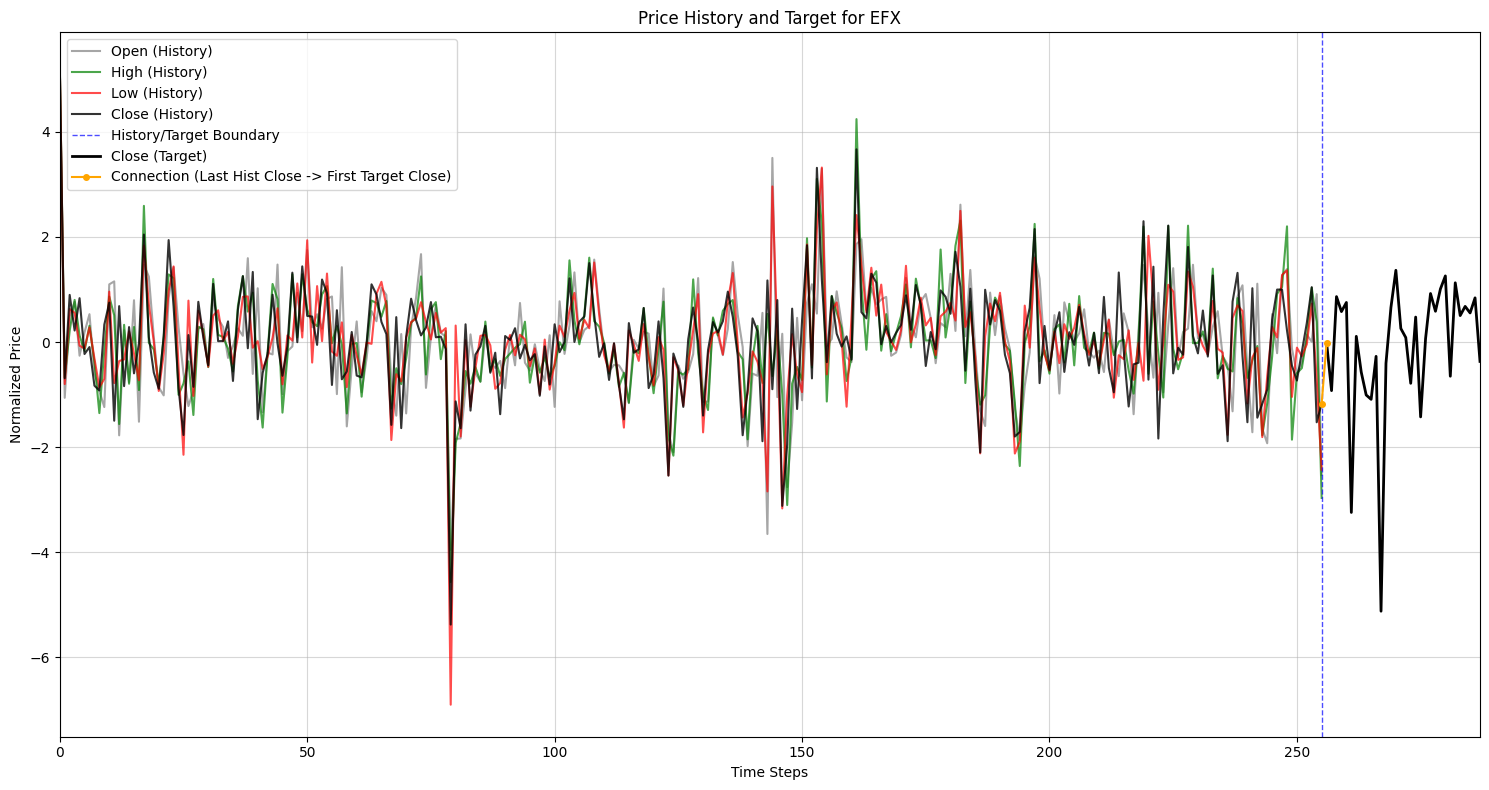

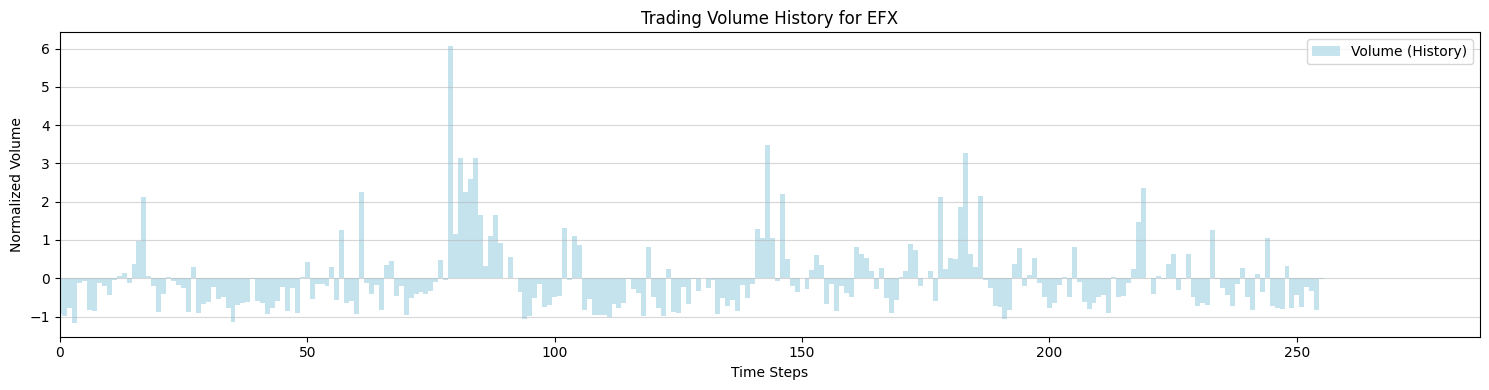

In [2]:
import torch
from src.utils.visualization import plot_dataset_sample, plot_denormalized_sample
from diffusers import DDPMScheduler


idx = torch.randint(0, len(dataset), (1,)).item()
# idx = 0
sample = dataset[idx]
print(f"History shape: {sample['history'].shape}")
print(f"Target shape: {sample['target'].shape}")
print(f"Ticker: {sample['ticker']}")
print(f"Stats: {sample['stats']}")


plot_dataset_sample(sample)
# plot_denormalized_sample(sample)

### Проверка Scheduler

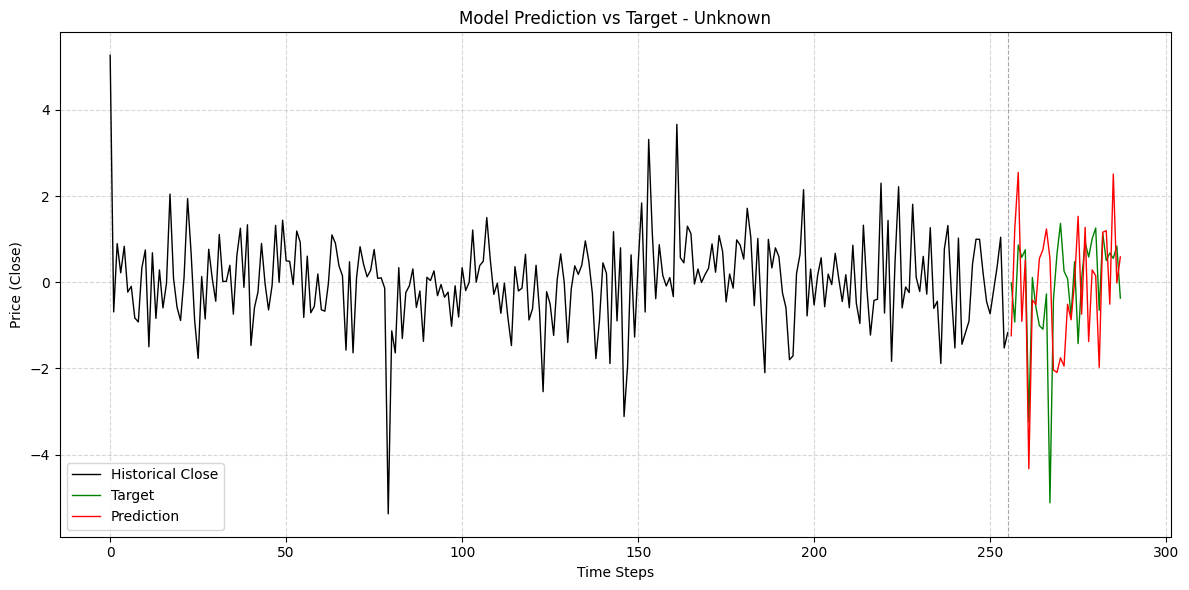

In [108]:
from diffusers import DDPMScheduler
from src.utils.visualization import plot_model_prediction

scheduler = DDPMScheduler()
noisy = scheduler.add_noise(sample['target'], torch.randn_like(sample['target']), torch.randint(990, 1000, (1,)))

plot_model_prediction(sample['history'], sample['target'], noisy)